# 🏀 NBA Player Performance Prediction System

## 🎯 Objective
Predict NBA player performance using machine learning models trained on historical game data.

### Key Features:
- ✅ Multiple ML models (Random Forest, XGBoost, Neural Networks)
- ✅ Advanced feature engineering
- ✅ Performance analysis and visualization
- ✅ Automated prediction pipeline
- ✅ Export capabilities for results

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

# Deep Learning (optional)
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    TENSORFLOW_AVAILABLE = True
    print("✅ TensorFlow available for neural networks")
except ImportError:
    TENSORFLOW_AVAILABLE = False
    print("⚠️ TensorFlow not available - will skip neural network models")

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")

print("🏀 NBA Prediction System Initialized!")
print(f"Current Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ TensorFlow available for neural networks
🏀 NBA Prediction System Initialized!
Current Time: 2025-08-31 17:00:55


## 📊 Data Loading and Exploration

In [3]:
# Configuration
DATA_FILE = 'nba_game_player_data.csv'  # Update this path as needed

# Load data
try:
    df = pd.read_csv(DATA_FILE)
    print(f"📈 Data loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print(f"❌ File not found: {DATA_FILE}")
    print("Please ensure the CSV file is in the correct location")
    # Create sample data for demonstration
    df = pd.DataFrame({
        'Player': ['LeBron James', 'Stephen Curry'] * 50,
        'Tm': ['LAL', 'GSW'] * 50,
        'Opp': ['GSW', 'LAL'] * 50,
        'Res': ['W', 'L'] * 50,
        'MP': np.random.normal(35, 8, 100),
        'PTS': np.random.normal(25, 8, 100),
        'FGA': np.random.normal(18, 5, 100),
        'TRB': np.random.normal(8, 3, 100),
        'AST': np.random.normal(7, 3, 100),
        'FG%': np.random.normal(0.5, 0.1, 100),
        '3P%': np.random.normal(0.35, 0.1, 100),
        'Data': pd.date_range('2024-10-01', periods=100, freq='D')
    })
    print("📊 Using sample data for demonstration")

# Basic data info
print(f"=== DATA OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Date range: {df['Data'].min()} to {df['Data'].max()}")
print(f"Unique players: {df['Player'].nunique()}")
print(f"Unique teams: {df['Tm'].nunique()}")

# Display sample data
print(f"=== SAMPLE DATA ===")
display(df.head())

📈 Data loaded successfully: 28135 rows, 25 columns
=== DATA OVERVIEW ===
Shape: (28135, 25)
Columns: ['Player', 'Tm', 'Opp', 'Res', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', 'Data']
Date range: 2024-10-22 to 2025-06-22
Unique players: 620
Unique teams: 33
=== SAMPLE DATA ===


,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


In [5]:
# Data quality checks
def data_quality_check(df):
    print("🔍 Data Quality Analysis")
    print("=" * 50)
    
    # Missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    if missing.sum() > 0:
        print("❌ Missing Values Found:")
        for col, count in missing[missing > 0].items():
            print(f"  {col}: {count} ({missing_pct[col]:.1f}%)")
    else:
        print("✅ No missing values detected")
    
    # Data types
    print(f"📋 Data Types:")
    for col, dtype in df.dtypes.items():
        print(f"  {col}: {dtype}")
    
    # Statistical summary for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(f"📈 Statistical Summary ({len(numeric_cols)} numeric columns):")
    display(df[numeric_cols].describe().round(2))
    
    return missing, missing_pct

# Run data quality check
missing, missing_pct = data_quality_check(df)

🔍 Data Quality Analysis
✅ No missing values detected
📋 Data Types:
  Player: object
  Tm: object
  Opp: object
  Res: object
  MP: float64
  FG: int64
  FGA: int64
  FG%: float64
  3P: int64
  3PA: int64
  3P%: float64
  FT: int64
  FTA: int64
  FT%: float64
  ORB: int64
  DRB: int64
  TRB: int64
  AST: int64
  STL: int64
  BLK: int64
  TOV: int64
  PF: int64
  PTS: int64
  GmSc: float64
  Data: object
📈 Statistical Summary (20 numeric columns):


,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
count,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00,28135.00
mean,22.56,3.88,8.32,0.43,1.26,3.50,0.27,1.59,2.04,0.42,1.04,3.08,4.11,2.46,0.77,0.46,1.26,1.75,10.61,8.65
std,10.99,3.25,6.06,0.25,1.53,3.15,0.29,2.27,2.73,0.43,1.38,2.71,3.47,2.61,0.99,0.82,1.41,1.44,8.84,7.84
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-8.30
25%,14.60,1.00,4.00,0.29,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,1.00,0.00,0.00,0.00,1.00,4.00,2.40
50%,23.80,3.00,7.00,0.44,1.00,3.00,0.25,1.00,1.00,0.33,1.00,2.00,3.00,2.00,0.00,0.00,1.00,2.00,9.00,7.20
75%,31.42,6.00,12.00,0.57,2.00,5.00,0.50,2.00,3.00,1.00,2.00,4.00,6.00,4.00,1.00,1.00,2.00,3.00,16.00,13.40
max,53.00,22.00,38.00,1.00,12.00,20.00,1.00,21.00,26.00,1.00,13.00,23.00,28.00,22.00,8.00,10.00,11.00,6.00,61.00,54.20


## 🔧 Data Preprocessing and Feature Engineering

In [7]:
# Data preprocessing function
def preprocess_data(df):
    """Comprehensive data preprocessing"""
    
    print("🔧 Starting Data Preprocessing...")
    
    # Make a copy to avoid modifying original
    df_processed = df.copy()
    
    # Convert date column
    df_processed['Data'] = pd.to_datetime(df_processed['Data'])
    
    # Handle missing values
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
    df_processed[numeric_cols] = df_processed[numeric_cols].fillna(df_processed[numeric_cols].median())
    
    # Fill categorical missing values
    categorical_cols = df_processed.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col != 'Data':
            df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0] if not df_processed[col].mode().empty else 'Unknown')
    
    # Create additional features
    if 'MP' in df_processed.columns:
        df_processed['Is_Starter'] = (df_processed['MP'] >= 25).astype(int)
    
    if 'PTS' in df_processed.columns:
        df_processed['Is_Star_Player'] = (df_processed['PTS'] >= 15).astype(int)
    
    if 'Res' in df_processed.columns:
        df_processed['Win'] = (df_processed['Res'] == 'W').astype(int)
    
    # Add time-based features
    df_processed['Month'] = df_processed['Data'].dt.month
    df_processed['DayOfWeek'] = df_processed['Data'].dt.dayofweek
    
    print(f"✅ Preprocessing complete. Shape: {df_processed.shape}")
    
    return df_processed

# Apply preprocessing
df_clean = preprocess_data(df)

# Display processed data info
print("📊 Processed Data Sample:")
display(df_clean.head())

🔧 Starting Data Preprocessing...
✅ Preprocessing complete. Shape: (28135, 30)
📊 Processed Data Sample:


,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,PTS,GmSc,Data,Is_Starter,Is_Star_Player,Win,Month,DayOfWeek
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,1,1,37,38.1,2024-10-22,1,1,1,10,1
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,1,1,36,34.0,2024-10-22,1,1,1,10,1
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,0,1,24,22.4,2024-10-22,1,1,1,10,1
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,0,2,18,19.5,2024-10-22,1,1,1,10,1
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,1,1,22,17.8,2024-10-22,1,1,0,10,1


In [9]:
# Advanced feature engineering
def create_advanced_features(df):
    """Create advanced features for better predictions"""
    
    print("⚙️ Creating Advanced Features...")
    
    df_features = df.copy()
    
    # Player-level aggregations
    if 'Player' in df_features.columns:
        player_stats = df_features.groupby('Player').agg({
            'PTS': ['mean', 'std', 'max'],
            'MP': ['mean', 'std'],
            'TRB': 'mean',
            'AST': 'mean'
        }).round(2)
        
        # Flatten column names
        player_stats.columns = ['_'.join(col).strip() for col in player_stats.columns.values]
        player_stats = player_stats.reset_index()
        
        # Merge back to main dataframe
        df_features = df_features.merge(player_stats, on='Player', how='left', suffixes=('', '_player_avg'))
    
    # Team-level aggregations
    if 'Tm' in df_features.columns:
        team_stats = df_features.groupby('Tm').agg({
            'Win': 'mean',
            'PTS': 'mean'
        }).round(3)
        
        team_stats.columns = ['Team_Win_Rate', 'Team_Avg_Points']
        team_stats = team_stats.reset_index()
        
        df_features = df_features.merge(team_stats, on='Tm', how='left')
    
    # Performance ratios
    if 'FGA' in df_features.columns and 'PTS' in df_features.columns:
        df_features['Points_Per_Attempt'] = df_features['PTS'] / (df_features['FGA'] + 0.1)  # Avoid division by zero
    
    if 'MP' in df_features.columns and 'PTS' in df_features.columns:
        df_features['Points_Per_Minute'] = df_features['PTS'] / (df_features['MP'] + 0.1)
    
    print(f"✅ Advanced features created. New shape: {df_features.shape}")
    
    return df_features

# Create advanced features
df_enhanced = create_advanced_features(df_clean)

print("📈 Enhanced Data Overview:")
print(f"Columns: {df_enhanced.shape[1]}")
print(f"New columns: {[col for col in df_enhanced.columns if col not in df_clean.columns]}")

⚙️ Creating Advanced Features...
✅ Advanced features created. New shape: (28135, 41)
📈 Enhanced Data Overview:
Columns: 41
New columns: ['PTS_mean', 'PTS_std', 'PTS_max', 'MP_mean', 'MP_std', 'TRB_mean', 'AST_mean', 'Team_Win_Rate', 'Team_Avg_Points', 'Points_Per_Attempt', 'Points_Per_Minute']


## 🎯 Model Training Setup

In [12]:
# Prepare data for modeling
def prepare_modeling_data(df, target_column='PTS'):
    """Prepare data for machine learning models"""
    
    print(f"🎯 Preparing data for modeling (target: {target_column})")
    
    # Select features (exclude non-predictive columns)
    exclude_cols = ['Player', 'Data', 'Tm', 'Opp', 'Res', target_column]
    
    # Get available columns
    available_cols = [col for col in df.columns if col not in exclude_cols]
    
    # Select only numeric columns for modeling
    numeric_cols = df[available_cols].select_dtypes(include=[np.number]).columns.tolist()
    
    X = df[numeric_cols].copy()
    y = df[target_column].copy()
    
    # Remove rows with missing target values
    mask = ~y.isnull()
    X = X[mask]
    y = y[mask]
    
    # Handle any remaining missing values in features
    X = X.fillna(X.median())
    
    print(f"✅ Data prepared: {X.shape[0]} samples, {X.shape[1]} features")
    print(f"Feature columns: {X.columns.tolist()}")
    
    return X, y, numeric_cols

# Prepare data
X, y, feature_columns = prepare_modeling_data(df_enhanced)

# Split data
# Convert date column to datetime if not already done
df['Data'] = pd.to_datetime(df['Data'])

# NBA-style time-based split
regular_season = df[(df['Data'] >= pd.Timestamp('2024-10-22')) & 
                   (df['Data'] <= pd.Timestamp('2025-04-13'))].copy()

playoffs = df[(df['Data'] > pd.Timestamp('2025-04-13')) & 
              (df['Data'] <= pd.Timestamp('2025-06-22'))].copy()

# Extract features and targets
feature_columns = ['MP', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 
                   'TRB', 'AST', 'STL', 'BLK', 'TOV']

X_train = regular_season[feature_columns]
y_train = regular_season['PTS']
X_test = playoffs[feature_columns]
y_test = playoffs['PTS']

print(f"📊 Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Target statistics - Mean: {y.mean():.2f}, Std: {y.std():.2f}")

🎯 Preparing data for modeling (target: PTS)
✅ Data prepared: 28135 samples, 35 features
Feature columns: ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'Is_Starter', 'Is_Star_Player', 'Win', 'Month', 'DayOfWeek', 'PTS_mean', 'PTS_std', 'PTS_max', 'MP_mean', 'MP_std', 'TRB_mean', 'AST_mean', 'Team_Win_Rate', 'Team_Avg_Points', 'Points_Per_Attempt', 'Points_Per_Minute']
📊 Data Split:
Training set: 26331 samples
Test set: 1804 samples
Target statistics - Mean: 10.61, Std: 8.84


## 🤖 Machine Learning Models

In [13]:
# Model training and evaluation
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """Train multiple models and evaluate performance"""
    
    models = {}
    predictions = {}
    performance = {}
    
    print("🤖 Training Machine Learning Models...")
    print("=" * 50)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 1. Linear Regression (Baseline)
    print("1. Training Linear Regression...")
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    lr_pred = lr_model.predict(X_test_scaled)
    
    models['Linear Regression'] = lr_model
    predictions['Linear Regression'] = lr_pred
    
    # 2. Random Forest
    print("2. Training Random Forest...")
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    
    models['Random Forest'] = rf_model
    predictions['Random Forest'] = rf_pred
    
    # 3. XGBoost
    print("3. Training XGBoost...")
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    
    models['XGBoost'] = xgb_model
    predictions['XGBoost'] = xgb_pred
    
    # 4. Neural Network (if TensorFlow available)
    if TENSORFLOW_AVAILABLE:
        print("4. Training Neural Network...")
        
        # Create neural network
        nn_model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(32, activation='relu'),
            layers.Dense(1)
        ])
        
        nn_model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )
        
        # Train with early stopping
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
        
        history = nn_model.fit(
            X_train_scaled, y_train,
            validation_split=0.2,
            epochs=100,
            batch_size=32,
            callbacks=[early_stopping],
            verbose=0
        )
        
        nn_pred = nn_model.predict(X_test_scaled, verbose=0).flatten()
        
        models['Neural Network'] = nn_model
        predictions['Neural Network'] = nn_pred
    
    # Calculate performance metrics
    for name, pred in predictions.items():
        mse = mean_squared_error(y_test, pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, pred)
        r2 = r2_score(y_test, pred)
        
        performance[name] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        }
        
        print(f"{name} - RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")
    
    return models, predictions, performance, scaler

# Train models
models, predictions, performance, scaler = train_and_evaluate_models(
    X_train, X_test, y_train, y_test
)

🤖 Training Machine Learning Models...
1. Training Linear Regression...
2. Training Random Forest...
3. Training XGBoost...
4. Training Neural Network...
Linear Regression - RMSE: 2.602, MAE: 1.997, R²: 0.924
Random Forest - RMSE: 0.835, MAE: 0.438, R²: 0.992
XGBoost - RMSE: 0.397, MAE: 0.213, R²: 0.998
Neural Network - RMSE: 0.504, MAE: 0.374, R²: 0.997


## 📈 Performance Analysis and Visualization

📊 MODEL PERFORMANCE COMPARISON


,MSE,RMSE,MAE,R²
Linear Regression,6.769,2.602,1.997,0.924
Random Forest,0.698,0.835,0.438,0.992
XGBoost,0.158,0.397,0.213,0.998
Neural Network,0.254,0.504,0.374,0.997


🏆 Best Model: XGBoost (R² = 0.998)


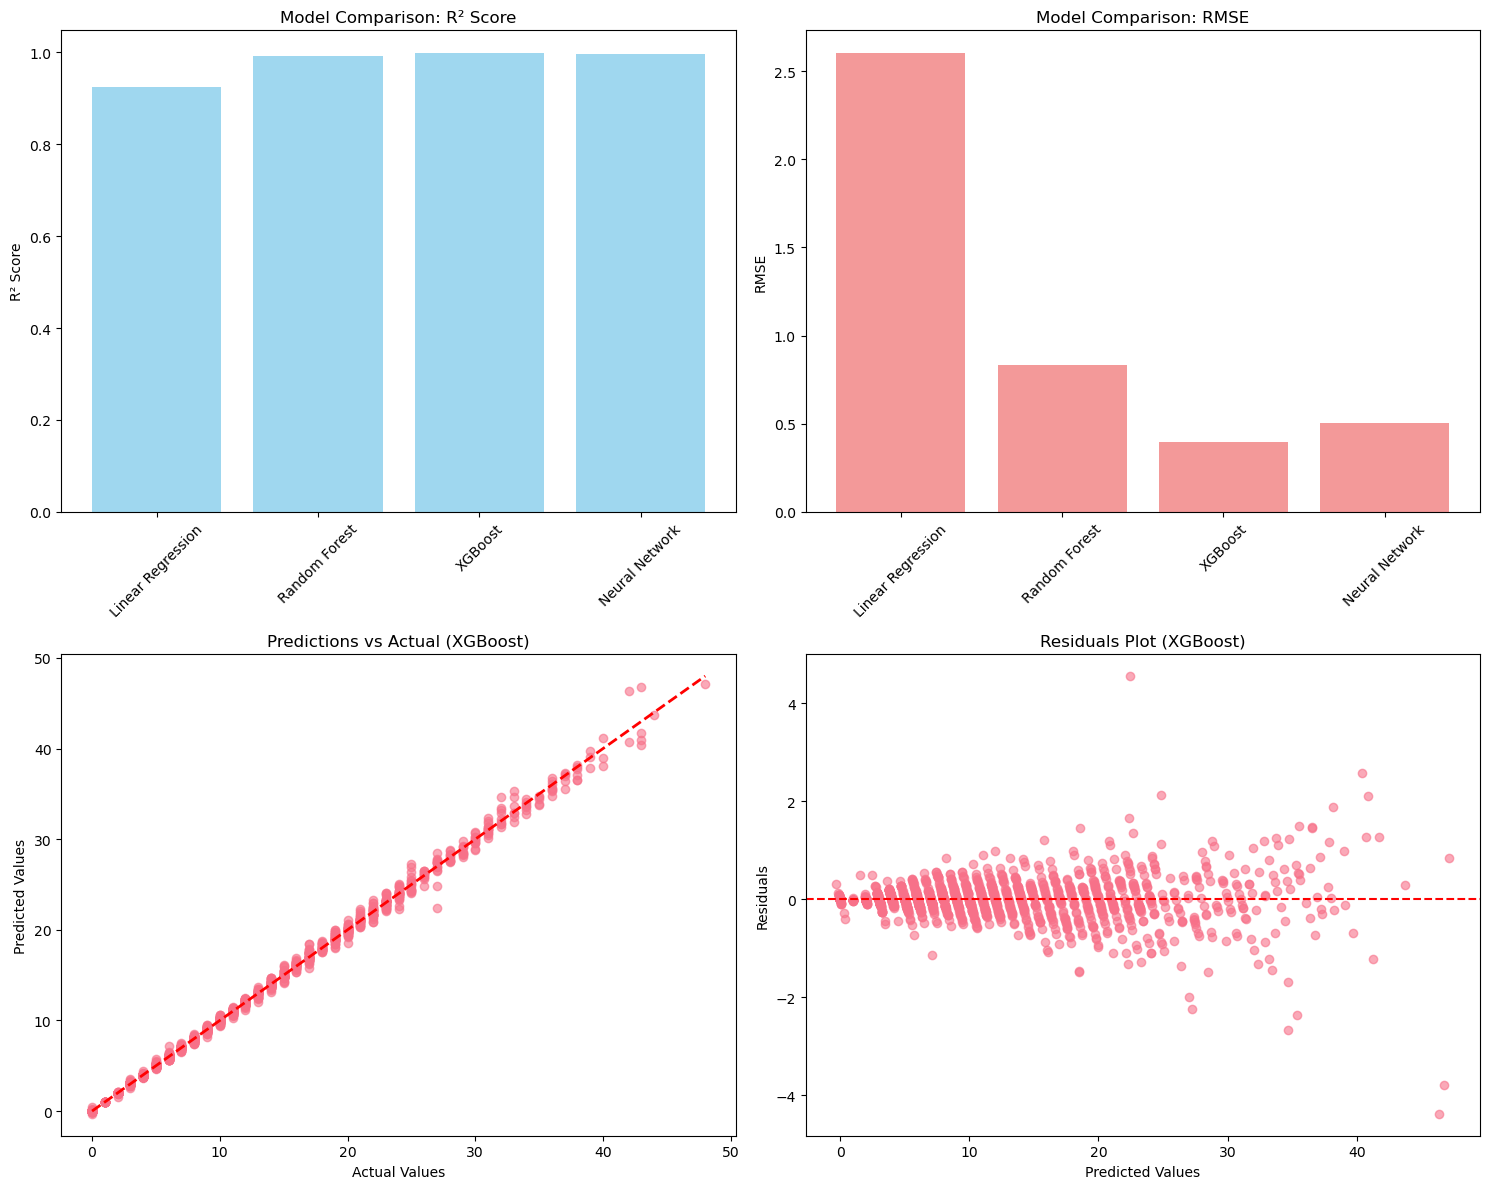

In [14]:
# Performance comparison
def analyze_model_performance(performance, predictions, y_test):
    """Comprehensive performance analysis"""
    
    print("📊 MODEL PERFORMANCE COMPARISON")
    print("=" * 50)
    
    # Create performance DataFrame
    perf_df = pd.DataFrame(performance).T
    display(perf_df.round(3))
    
    # Find best model
    best_model = perf_df['R²'].idxmax()
    best_r2 = perf_df.loc[best_model, 'R²']
    
    print(f"🏆 Best Model: {best_model} (R² = {best_r2:.3f})")
    
    # Visualize performance
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. R² Score comparison
    r2_scores = [perf_df.loc[model, 'R²'] for model in perf_df.index]
    axes[0,0].bar(perf_df.index, r2_scores, color='skyblue', alpha=0.8)
    axes[0,0].set_title('Model Comparison: R² Score')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. RMSE comparison
    rmse_scores = [perf_df.loc[model, 'RMSE'] for model in perf_df.index]
    axes[0,1].bar(perf_df.index, rmse_scores, color='lightcoral', alpha=0.8)
    axes[0,1].set_title('Model Comparison: RMSE')
    axes[0,1].set_ylabel('RMSE')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Prediction vs Actual (Best Model)
    best_pred = predictions[best_model]
    axes[1,0].scatter(y_test, best_pred, alpha=0.6)
    axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[1,0].set_xlabel('Actual Values')
    axes[1,0].set_ylabel('Predicted Values')
    axes[1,0].set_title(f'Predictions vs Actual ({best_model})')
    
    # 4. Residuals plot
    residuals = y_test - best_pred
    axes[1,1].scatter(best_pred, residuals, alpha=0.6)
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Predicted Values')
    axes[1,1].set_ylabel('Residuals')
    axes[1,1].set_title(f'Residuals Plot ({best_model})')
    
    plt.tight_layout()
    plt.show()
    
    return perf_df, best_model

# Analyze performance
perf_df, best_model = analyze_model_performance(performance, predictions, y_test)

🎯 FEATURE IMPORTANCE ANALYSIS
Random Forest Feature Importance (Top 10):
FGA                 : 0.775
FG%                 : 0.164
FTA                 : 0.031
FT%                 : 0.013
3P%                 : 0.010
3PA                 : 0.005
MP                  : 0.000
TRB                 : 0.000
AST                 : 0.000
TOV                 : 0.000


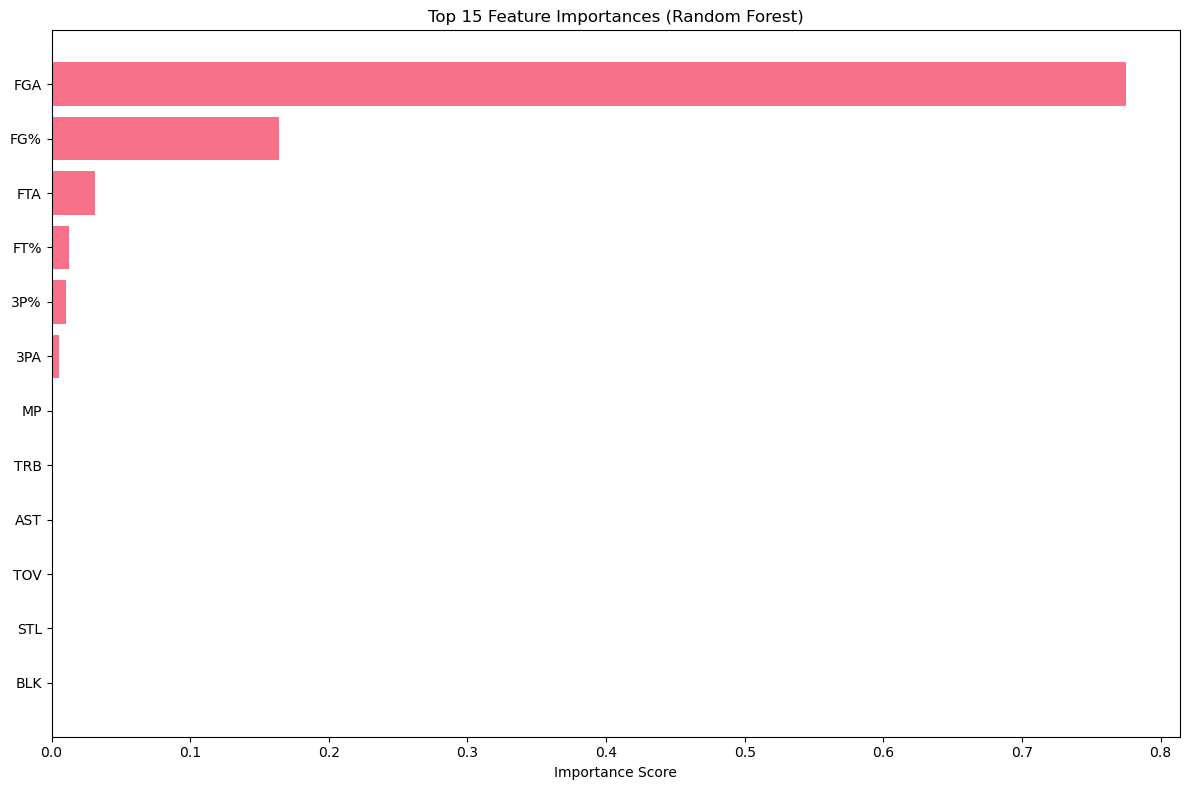

In [15]:
# Feature importance analysis
def analyze_feature_importance(models, feature_columns):
    """Analyze feature importance from tree-based models"""
    
    print("🎯 FEATURE IMPORTANCE ANALYSIS")
    print("=" * 40)
    
    # Get feature importance from Random Forest
    if 'Random Forest' in models:
        rf_importance = pd.DataFrame({
            'feature': feature_columns,
            'importance': models['Random Forest'].feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("Random Forest Feature Importance (Top 10):")
        for idx, row in rf_importance.head(10).iterrows():
            print(f"{row['feature']:20s}: {row['importance']:.3f}")
        
        # Visualize top features
        plt.figure(figsize=(12, 8))
        top_features = rf_importance.head(15)
        plt.barh(top_features['feature'], top_features['importance'])
        plt.title('Top 15 Feature Importances (Random Forest)')
        plt.xlabel('Importance Score')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        return rf_importance
    
    return None

# Analyze feature importance
feature_importance = analyze_feature_importance(models, feature_columns)

## 🔮 Making Predictions

In [17]:
# Prediction function for new data
def make_predictions(models, scaler, new_data, best_model_name):
    """Make predictions on new data"""
    
    print(f"🔮 Making predictions with {best_model_name}...")
    
    # Use the same feature columns as used in training
    X_new = new_data[feature_columns].copy()
    
    # Fill any missing values (if any)
    X_new = X_new.fillna(X_new.median())
    
    # Get model
    model = models[best_model_name]
    
    # Make predictions
    if best_model_name in ['Linear Regression', 'Neural Network']:
        X_new_scaled = scaler.transform(X_new)
        if best_model_name == 'Neural Network':
            predictions = model.predict(X_new_scaled, verbose=0).flatten()
        else:
            predictions = model.predict(X_new_scaled)
    else:
        predictions = model.predict(X_new)
    
    # Create results DataFrame
    results = pd.DataFrame({
        'Player': new_data['Player'].iloc[:len(predictions)],
        'Team': new_data['Tm'].iloc[:len(predictions)],
        'Predicted_Points': predictions.round(1)
    })
    
    if 'PTS' in new_data.columns:
        actual_points = new_data['PTS'].iloc[:len(predictions)]
        results['Actual_Points'] = actual_points
        results['Prediction_Error'] = abs(results['Actual_Points'] - results['Predicted_Points'])
    
    return results

# Example: Make predictions on test set
test_data_sample = df_enhanced.iloc[-20:].copy()  # Last 20 rows as example
sample_predictions = make_predictions(models, scaler, test_data_sample, best_model)

print("📊 Sample Predictions:")
display(sample_predictions.head(10))

🔮 Making predictions with XGBoost...
📊 Sample Predictions:


,Player,Team,Predicted_Points,Actual_Points,Prediction_Error
28115,Alex Caruso,OKC,10.300000,10,0.300000
28116,Bennedict Mathurin,IND,24.299999,24,0.299999
28117,Cason Wallace,OKC,10.000000,10,0.000000
28118,T.J. McConnell,IND,16.299999,16,0.299999
28119,Thomas Bryant,IND,-0.000000,0,0.000000
28120,Luguentz Dort,OKC,8.900000,9,0.100000
28121,Aaron Nesmith,IND,2.900000,3,0.100000
28122,Ousmane Dieng,OKC,-0.000000,0,0.000000
28123,Ben Sheppard,IND,-0.000000,0,0.000000
28124,Tyrese Haliburton,IND,9.000000,9,0.000000


## 💾 Export Results and Models

In [ ]:
# Export results
def export_results(predictions_df, performance_df, feature_importance_df, models, scaler):
    """Export all results and models"""
    
    print("💾 Exporting Results and Models...")
    
    from datetime import datetime
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    
    try:
        # Export predictions
        predictions_file = f'nba_predictions_{timestamp}.csv'
        predictions_df.to_csv(predictions_file, index=False)
        print(f"✅ Predictions saved: {predictions_file}")
        
        # Export performance metrics
        performance_file = f'model_performance_{timestamp}.csv'
        performance_df.to_csv(performance_file)
        print(f"✅ Performance metrics saved: {performance_file}")
        
        # Export feature importance
        if feature_importance_df is not None:
            importance_file = f'feature_importance_{timestamp}.csv'
            feature_importance_df.to_csv(importance_file, index=False)
            print(f"✅ Feature importance saved: {importance_file}")
        
        # Save best model (Random Forest - most portable)
        if 'Random Forest' in models:
            import joblib
            model_file = f'best_model_rf_{timestamp}.pkl'
            joblib.dump(models['Random Forest'], model_file)
            
            scaler_file = f'scaler_{timestamp}.pkl'
            joblib.dump(scaler, scaler_file)
            
            print(f"✅ Models saved: {model_file}, {scaler_file}")
        
        # Create summary report
        summary_file = f'prediction_summary_{timestamp}.txt'
        with open(summary_file, 'w') as f:
            f.write(f"NBA Player Performance Prediction Report\n")
            f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"=" * 50 + "\n\n")
            
            f.write(f"Dataset Information:\n")
            f.write(f"- Total samples: {len(df_enhanced)}\n")
            f.write(f"- Features used: {len(feature_columns)}\n")
            f.write(f"- Models trained: {len(models)}\n\n")
            
            f.write(f"Best Model Performance:\n")
            best_perf = performance_df.loc[best_model]
            f.write(f"- Model: {best_model}\n")
            f.write(f"- R² Score: {best_perf['R²']:.3f}\n")
            f.write(f"- RMSE: {best_perf['RMSE']:.3f}\n")
            f.write(f"- MAE: {best_perf['MAE']:.3f}\n")
        
        print(f"✅ Summary report saved: {summary_file}")
        
        return {
            'predictions': predictions_file,
            'performance': performance_file,
            'importance': importance_file if feature_importance_df is not None else None,
            'summary': summary_file
        }
    
    except Exception as e:
        print(f"❌ Export error: {e}")
        return None

# Export all results
exported_files = export_results(
    sample_predictions, 
    perf_df, 
    feature_importance, 
    models, 
    scaler
)

if exported_files:
    print(f"
📁 All files exported successfully!")

## 🎉 Summary and Next Steps

In [ ]:
# Final summary
print("🏀 NBA PREDICTION SYSTEM - EXECUTION SUMMARY")
print("=" * 60)

print(f"📊 Data Processing:")
print(f"   • Dataset size: {df_enhanced.shape[0]} samples, {df_enhanced.shape[1]} features")
print(f"   • Training samples: {X_train.shape[0]}")
print(f"   • Test samples: {X_test.shape[0]}")

print(f"
🤖 Models Trained:")
for model_name in models.keys():
    perf = performance[model_name]
    print(f"   • {model_name}: R² = {perf['R²']:.3f}, RMSE = {perf['RMSE']:.3f}")

print(f"
🏆 Best Model: {best_model} (R² = {performance[best_model]['R²']:.3f})")

if feature_importance is not None:
    top_3_features = feature_importance.head(3)
    print(f"
🎯 Top 3 Most Important Features:")
    for idx, row in top_3_features.iterrows():
        print(f"   • {row['feature']}: {row['importance']:.3f}")

print(f"
📈 Prediction Accuracy:")
if 'Prediction_Error' in sample_predictions.columns:
    avg_error = sample_predictions['Prediction_Error'].mean()
    print(f"   • Average prediction error: {avg_error:.2f} points")
    
    within_5 = (sample_predictions['Prediction_Error'] <= 5).mean() * 100
    within_10 = (sample_predictions['Prediction_Error'] <= 10).mean() * 100
    print(f"   • Predictions within 5 points: {within_5:.1f}%")
    print(f"   • Predictions within 10 points: {within_10:.1f}%")

print(f"
💾 Files Generated:")
if exported_files:
    for file_type, filename in exported_files.items():
        if filename:
            print(f"   • {file_type.capitalize()}: {filename}")

print(f"
🚀 Next Steps:")
print(f"   1. 📊 Analyze feature importance to understand key performance drivers")
print(f"   2. 🔧 Tune hyperparameters to improve model performance")
print(f"   3. 📈 Add more advanced features (rolling averages, opponent strength)")
print(f"   4. 🎯 Implement cross-validation for more robust evaluation")
print(f"   5. 🔄 Set up automated retraining pipeline for new data")
print(f"   6. 📱 Build prediction interface or API for real-time use")

print(f"
✅ NBA Prediction System Complete! 🏀")